In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [59]:
img = image.load_img(r"C:\Users\hp\OneDrive\Data Science\Practical\Deep Learning\CNN\training\Happy\3.jpeg")

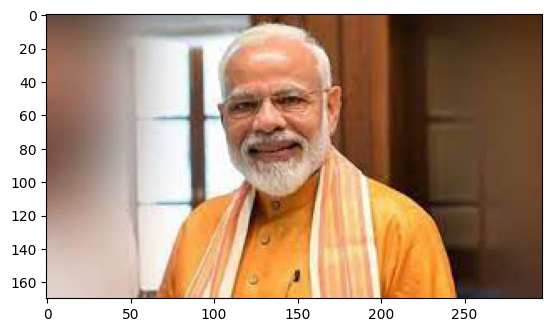

In [60]:
plt.imshow(img)

In [61]:
# 3 dimension metrics are created for the image
# the value ranges from 0-255
# read image into an array

i1 = cv2.imread(r"C:\Users\hp\OneDrive\Data Science\Practical\Deep Learning\CNN\training\Happy\3.jpeg")
i1

array([[[ 63,  73, 103],
        [ 63,  73, 103],
        [ 63,  73, 103],
        ...,
        [ 15,  41,  77],
        [ 15,  41,  77],
        [ 15,  41,  77]],

       [[ 64,  74, 104],
        [ 64,  74, 104],
        [ 64,  74, 104],
        ...,
        [ 15,  41,  77],
        [ 15,  41,  77],
        [ 15,  41,  77]],

       [[ 65,  74, 107],
        [ 65,  74, 107],
        [ 65,  75, 105],
        ...,
        [ 16,  42,  78],
        [ 16,  42,  78],
        [ 16,  42,  78]],

       ...,

       [[204, 212, 229],
        [203, 211, 228],
        [203, 211, 228],
        ...,
        [ 40,  50,  80],
        [ 40,  50,  80],
        [ 40,  49,  82]],

       [[203, 211, 228],
        [203, 211, 228],
        [203, 211, 228],
        ...,
        [ 39,  49,  79],
        [ 39,  49,  79],
        [ 40,  49,  82]],

       [[203, 211, 228],
        [203, 211, 228],
        [203, 211, 228],
        ...,
        [ 39,  49,  79],
        [ 39,  49,  79],
        [ 40,  49,  82]]

In [62]:
i1.shape

# height,width,3 is for colored(RGB) image

(170, 297, 3)

In [63]:
train = ImageDataGenerator(rescale=1/255)
validataion = ImageDataGenerator(rescale=1/255)
# scaling the images between 0 to 1 

In [64]:
train_dataset = train.flow_from_directory(r'C:\Users\hp\OneDrive\Data Science\Practical\Deep Learning\CNN\training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'C:\Users\hp\OneDrive\Data Science\Practical\Deep Learning\CNN\validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [36]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [37]:
validataion_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [38]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
# now we are applying maxpooling 
'''1st convolution layer with 16 filters each size 3X3.It uses the 'relu' activation 
                                        function and expects input images with a shape of (200, 200, 3) 
                                        where 3 represents the number of color channels (RGB).
                                        After that applying first max-pooling layer with a pool size of (2, 2)''' 
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    # 2nd convolution layer with 32 filters each of size 3X3
                                    # applying 2nd max pooling layer with pool size of (2,2)
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    # 3rd convolution layer with 64 filters each of size 3X3
                                    # applying 2nd max pooling lay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           er with pool size of (2,2)                                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                     #This layer is used to flatten the 3D feature maps into a 1D vector 
                                     #preparing the data for the fully connected (dense) layers.'''
                                    tf.keras.layers.Flatten(),
                                    #A fully connected layer with 512 neurons and 'relu' activation function. 
                                    #This layer is used to capture higher-level patterns in the data.
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
                                    #The output layer with a single neuron and a 'sigmoid' activation function.
                                   
                                    ]
                                    )

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

In [52]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validataion_dataset)

Epoch 1/10
3/3 [==============================] - 1s 144ms/step - loss: 7.7382 - accuracy: 0.4444
Epoch 2/10
3/3 [==============================] - 0s 123ms/step - loss: 1.4137 - accuracy: 0.2222
Epoch 3/10
3/3 [==============================] - 0s 85ms/step - loss: 0.5568 - accuracy: 0.7500
Epoch 4/10
3/3 [==============================] - 0s 87ms/step - loss: 0.5782 - accuracy: 0.6250
Epoch 5/10
3/3 [==============================] - 0s 101ms/step - loss: 0.5404 - accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 0s 85ms/step - loss: 0.3763 - accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 0s 91ms/step - loss: 0.6883 - accuracy: 0.6250
Epoch 8/10
3/3 [==============================] - 0s 90ms/step - loss: 0.5361 - accuracy: 0.6250
Epoch 9/10
3/3 [==============================] - 0s 85ms/step - loss: 0.2931 - accuracy: 0.8750
Epoch 10/10
3/3 [==============================] - 0s 93ms/step - loss: 0.3399 - accuracy: 0.8889


In [53]:
dir_path = r'C:\Users\hp\OneDrive\Data Science\Practical\Deep Learning\CNN\testing'
for i in os.listdir(dir_path):
    print(i)

1.jpg
2.jpg
3.jpg
4.jpg
IMG-20180430-WA0032.jpg
IMG_20180423_114930.jpg
IMG_20180822_205339.jpg
IMG_20180929_152642.jpg
IMG_20181007_214821.jpg
modi_1s.jpeg
modi_2s.jpeg
modi_3s.jpeg
modi_4s.jpeg
modi_5s.jpeg
modi_h1.jpeg
modi_h2.jpeg
modi_h3.jpeg


In [56]:
dir_path = r'C:\Users\hp\OneDrive\Data Science\Practical\Deep Learning\CNN\testing'

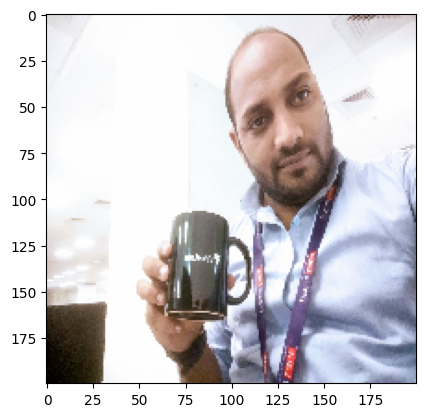

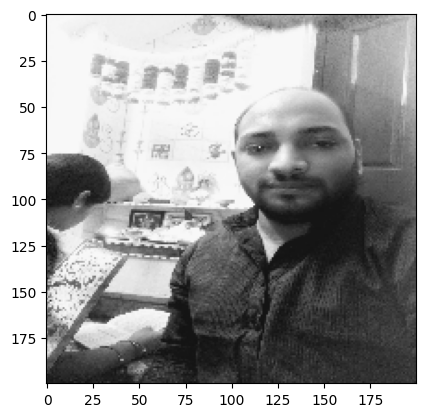

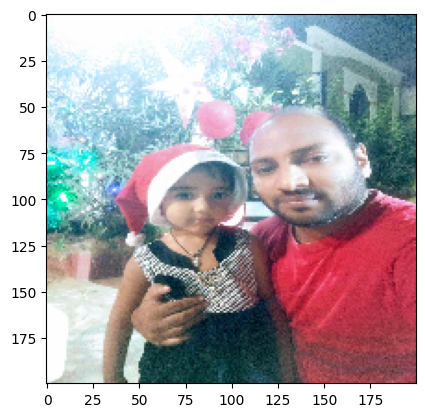

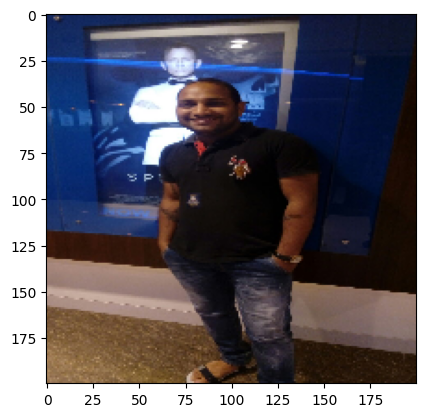

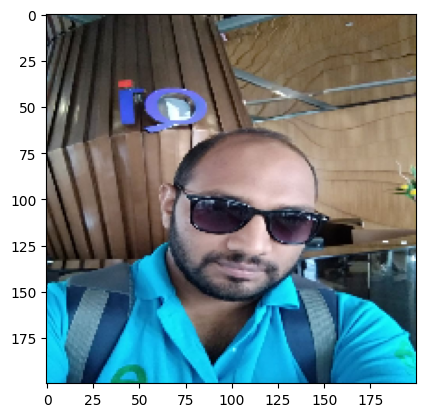

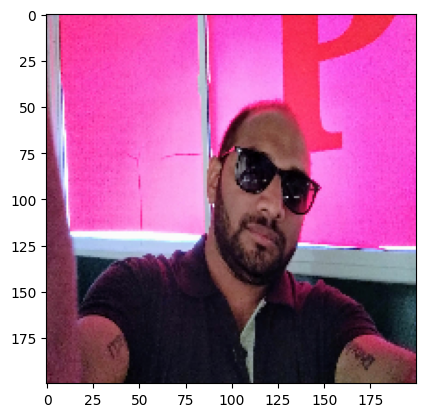

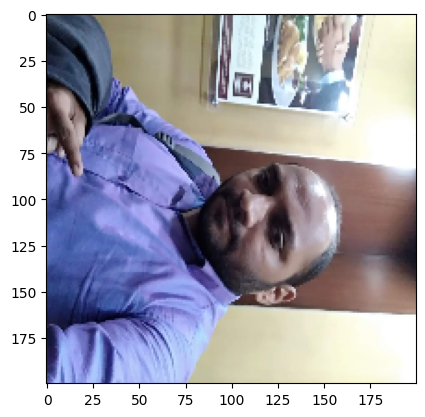

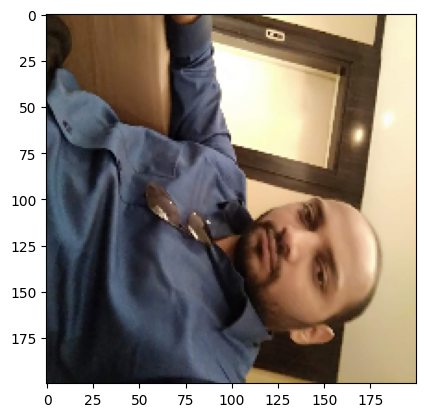

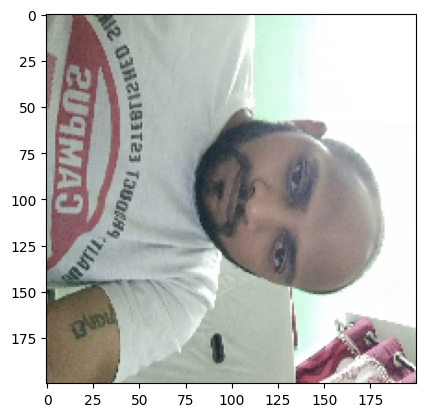

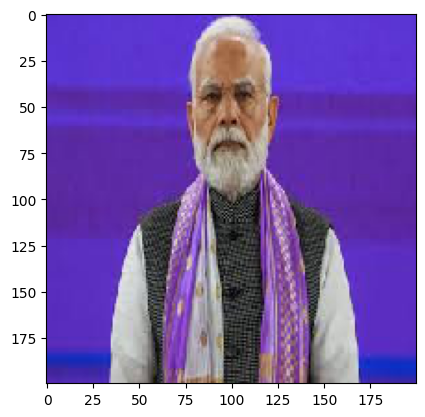

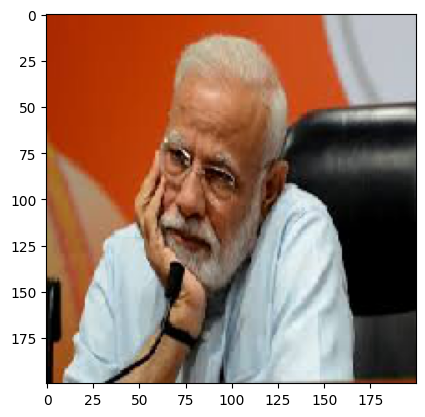

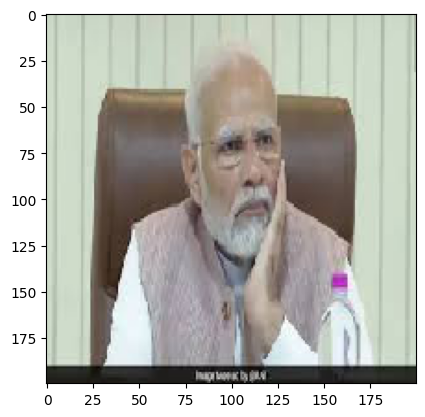

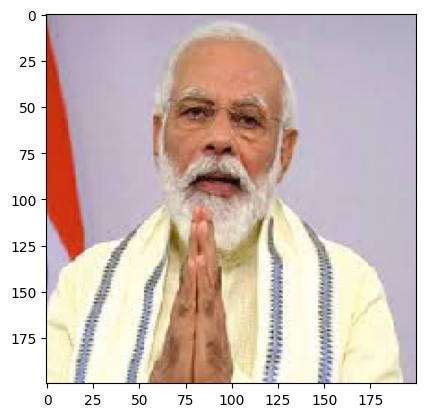

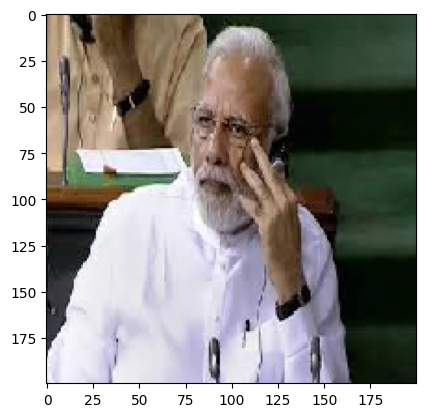

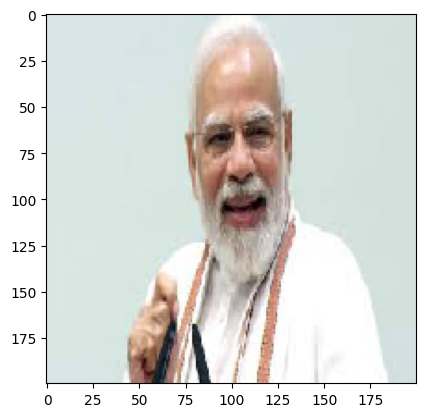

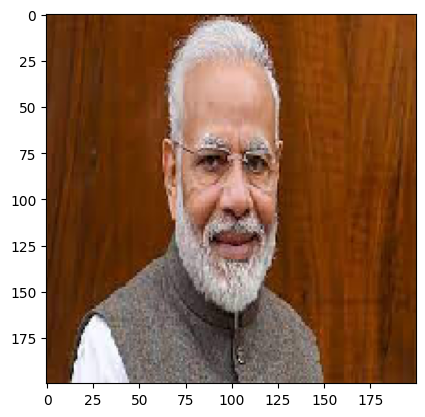

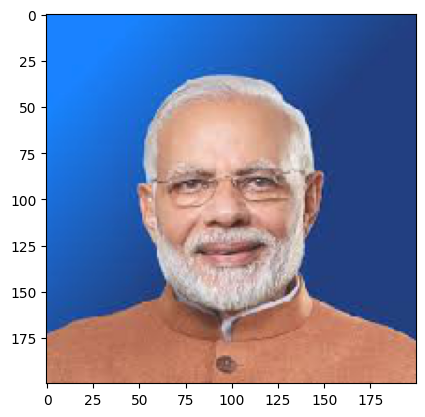

In [57]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()